<a href="https://colab.research.google.com/github/PierfrancescoElia/AICyberLabs/blob/main/Lab01/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Introduction to Deep Learning

| Member | ID |
| -- | -- |
| Alessandro Meneghini| s332228 |
| Pierfrancesco Elia | s331497 |
| Ankesh Porwal | s328746 |


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import time


## Task 1: Data Preprocessing

In this step, we analyze the dataset to ensure effective preprocessing and start with a clean, functional dataset. We identify NaN and Inf values, which we decide to remove. Additionally, we find certain features that are mostly zero, except for a few cases, making them irrelevant for our analysis.

Steps Performed:
- Removed duplicate entries.
- Identified and removed NaN values.
- Identified and removed Inf values.
- Data Visualization
- Evaluated features with minimal variation and removed those deemed irrelevant.
- Dataset splitting
- Standardization


In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# import the dataset
dataset_url = 'https://raw.githubusercontent.com/PierfrancescoElia/AICyberLabs/refs/heads/main/Lab01/dataset_lab_1.csv'
df = pd.read_csv(dataset_url)

df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


20 columns of DoS Hulk are empty, we will drop them


In [12]:
# Remove duplicates
df = df.drop_duplicates()

#check NaN value to decide if delete them or maybe popolate with zero
display(df[df.isna().any(axis=1)])
# Remove rows with nan value
df = df.dropna()

# check inf values
display(df[df.isin([np.inf,-np.inf]).any(axis=1)])
# Remove rows with inf
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
2130,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,52606,Benign
16361,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,19152,Benign
20043,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,80,DoS Hulk


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
6683,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64231,Benign
9265,0,0.0,1,0.0,0,inf,0,1,7.0,0.0,9.333333,14,2,inf,2,47542,Benign
10138,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,17774,Benign
11793,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,21,Benign
14833,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64299,Benign
15627,0,0.0,0,6.0,6,inf,1,0,6.0,0.0,6.000000,6,1,inf,1,443,Benign
29324,0,0.0,0,6.0,6,inf,1,0,0.0,0.0,2.000000,0,1,inf,1,1026,PortScan


<ipython-input-12-bec7d7c6b4d8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


### Data Visualization

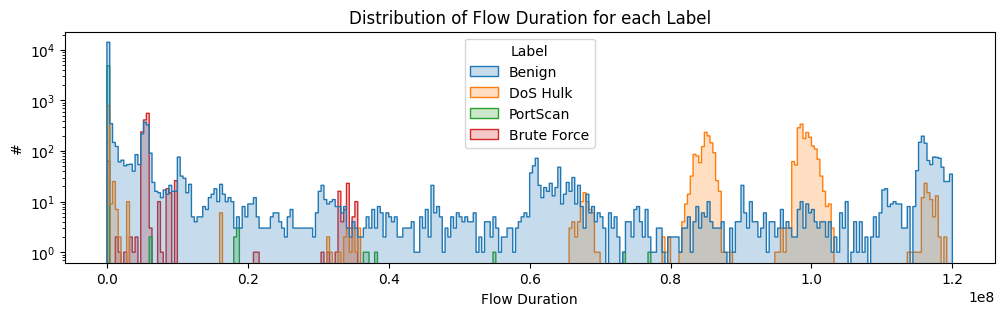

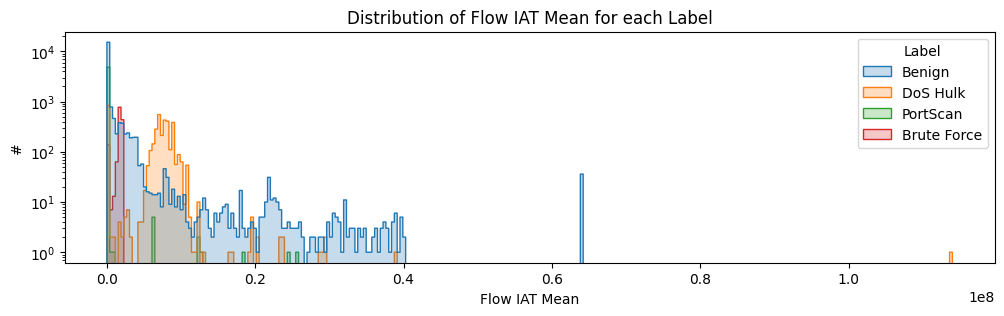

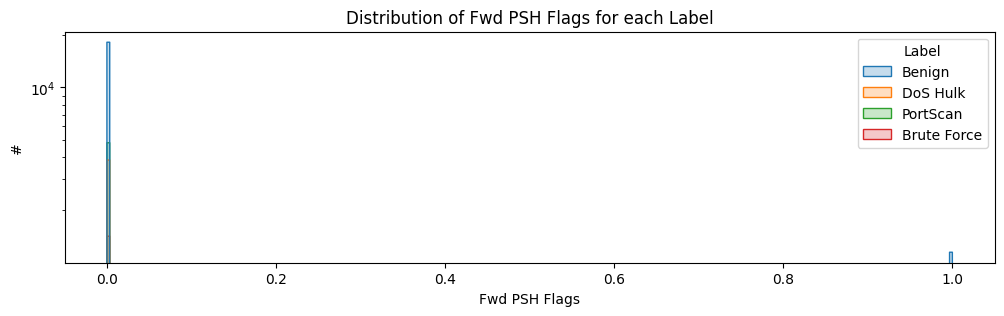

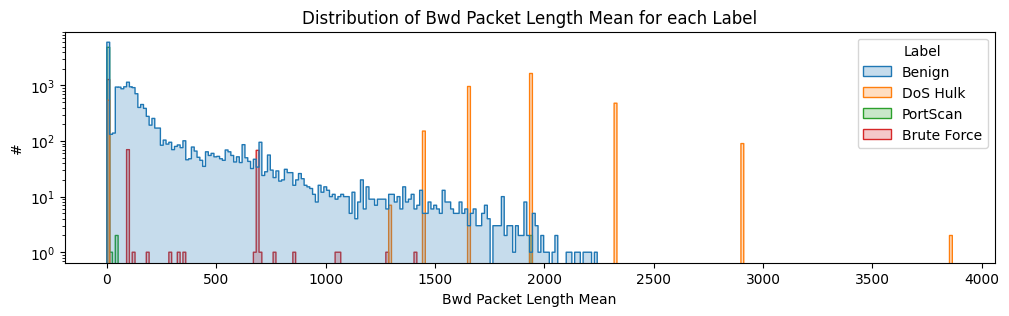

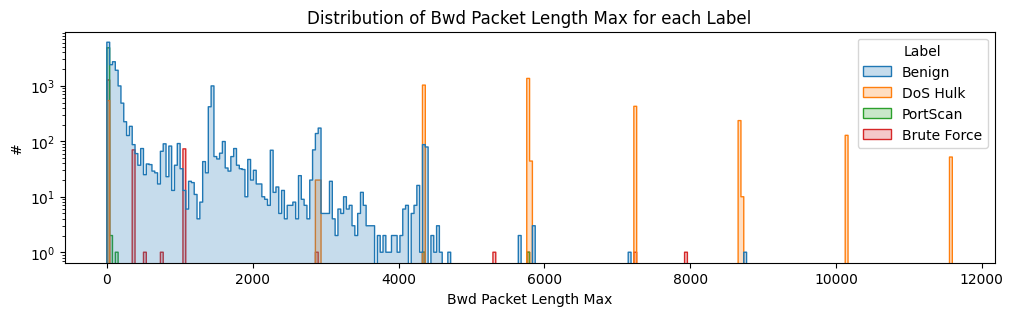

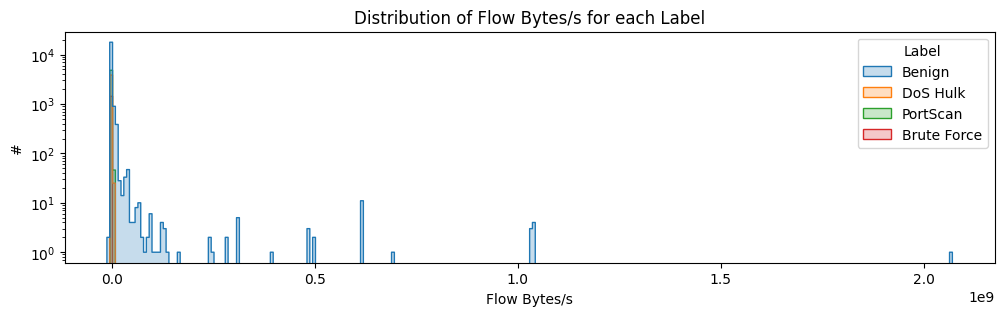

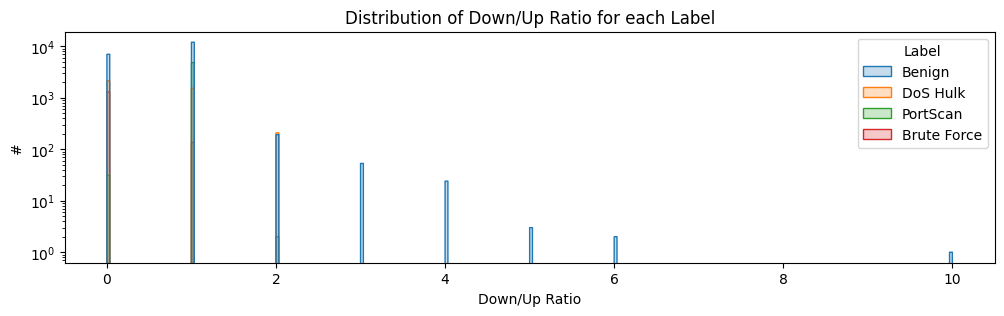

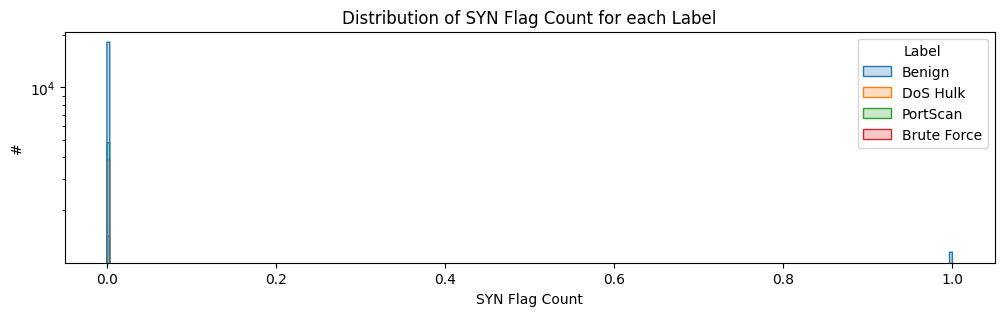

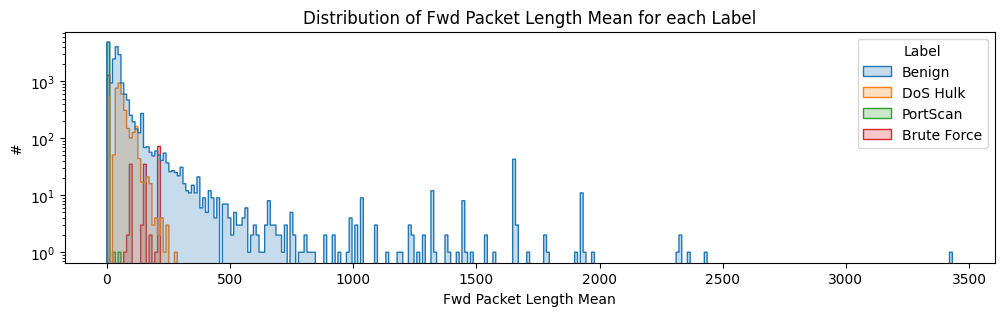

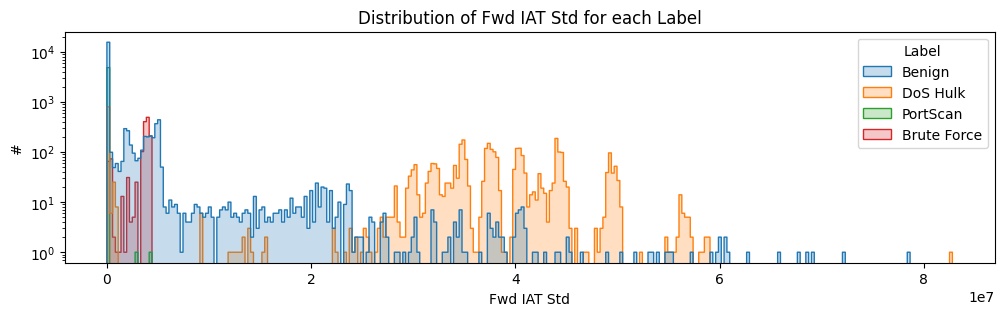

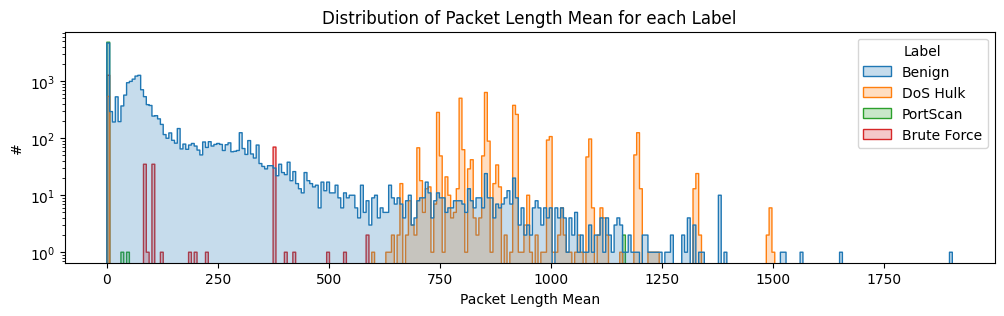

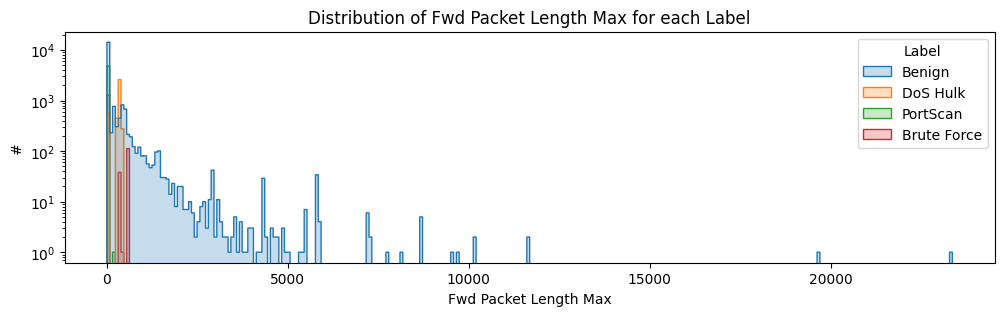

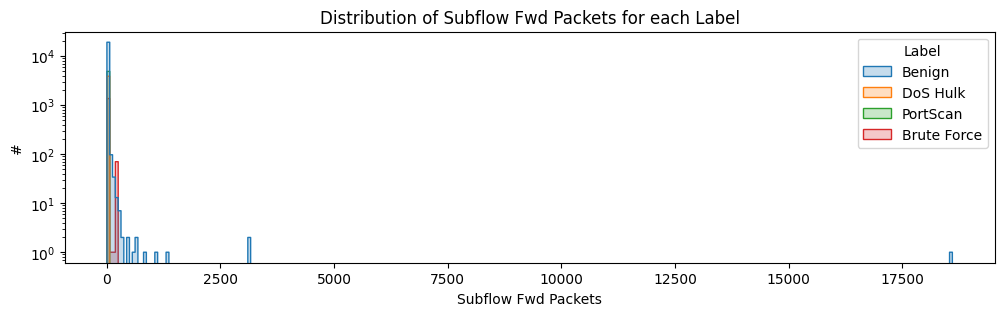

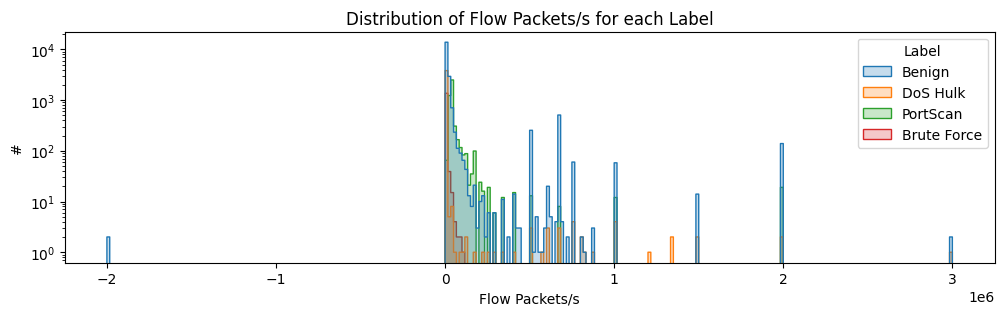

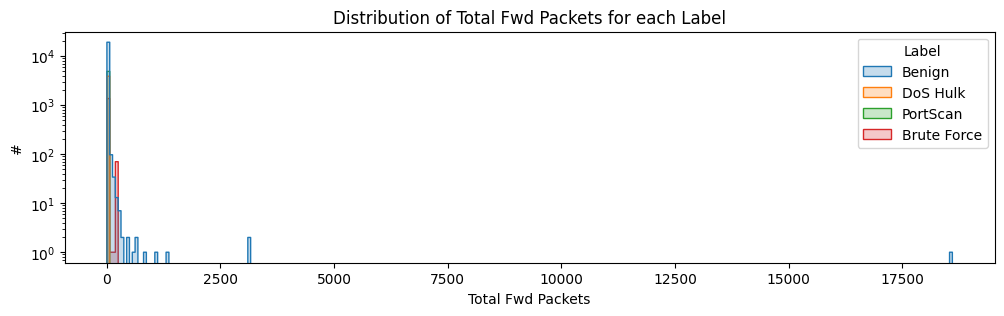

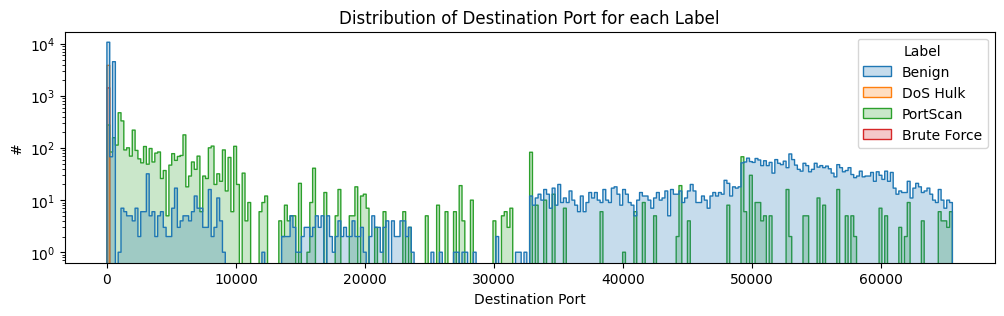

In [13]:
label_column = df.columns[-1]  # Get the last column (assumed to be categorical labels)

# Ensure the label column is categorical for proper hue handling
df[label_column] = df[label_column].astype(str)  # Convert to string to prevent issues

for column in df.columns[:-1]:  # Iterate over all columns except the last one
    plt.figure(figsize=(12, 3))
    ax = sns.histplot(
        data=df,
        x=column,
        hue=label_column,  # Dynamically set the hue based on last column
        element="step",
        common_norm=False,
        multiple="layer",
        bins=300,
        legend=True
    )

    # Manually fetch the legend handles and labels
    handles, labels = ax.get_legend_handles_labels()

    if labels:  # Only add legend if labels exist
        plt.legend(handles=handles, labels=labels, title=label_column)

    plt.yscale("log")
    plt.title(f'Distribution of {column} for each {label_column}')
    plt.xlabel(column)
    plt.ylabel('#')
    plt.show()

We see when features `Fwd PSH Flags` and `SYN Flag Count` are `1`, the row is always labeled as Bening, these are not features that are usefull to classify attacks and for this reason they are dropped.

In [14]:
df.drop('SYN Flag Count', axis=1, inplace=True)
df.drop('Fwd PSH Flags', axis=1, inplace=True)

In [15]:
# Encode labels
label_encoder = LabelEncoder()
labels = df['Label']
df['Label'] = label_encoder.fit_transform(labels)

label_mapping = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(label_mapping)


{'Benign': 0, 'Brute Force': 1, 'DoS Hulk': 2, 'PortScan': 3}


### Dataset Splitting

   - **Training Set** → 60%
   - **Validation Set** → 20%
   - **Test Set** → 20%

In [16]:
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (17631, 14)
Validation set: (5877, 14)
Test set: (5878, 14)


### Standardization

#### How do you preprocess the data? Is the preprocessing the same as for the training partition?

When preprocessing the test partition of a dataset, the steps should generally align with the preprocessing applied to the training partition to ensure consistency. However, the test partition should not influence the preprocessing parameters determined during the training stage (e.g., mean, standard deviation, or min/max values). For this reason we `.fit_transform()` only on the `X_Train` set and apply the scaler with `transfomr()` on `X_val` and `X_test`



### Standardization
We standardize the dataset to avoid that some features dominate on the others. Standardizing the features ensures that all input variables have a mean of 0 and a standard deviation of 1, which improves model convergence and prevents certain features from dominating due to scale differences.

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Task 2: Shallow Neural Network

| **Hyperparameter**         | **Value**                                      |
|----------------------------|-----------------------------------------------|
| Layers                     | 1                                             |
| Neurons per Layer          | {32, 64, 128}                                 |
| Activation                 | Linear                                        |
| Weight Initialization      | Default                                       |
| Batch Size                 | 64                                            |
| Loss Function              | Cross-Entropy                                 |
| Optimizer                  | AdamW                                         |
| Learning Rate              | 0.0005                                        |
| Epochs & Early Stopping    | 100 or shorter based on the designed criteria |
| Regularization             | None                                          |

Answer the following questions.

- Describe how you carried out the training process.
- How does the loss curve evolve during training on the training and validation set?
- How do you select the best model across epochs? Which model do you use for validation
and test?
- What is the overall classification performance in the validation and test datasets and
considering the different classes? Indicate the results.
- Why is the performance of the model so poor?

Change the model with the best performance (optimal number of neurons) by changing the
activation function in ReLU and evaluate the effects.

Epoch 1/100, Train Loss: 3.8880, Val Loss: 3.5266
Epoch 2/100, Train Loss: 3.2339, Val Loss: 2.9561
Epoch 3/100, Train Loss: 2.7257, Val Loss: 2.5087
Epoch 4/100, Train Loss: 2.3294, Val Loss: 2.1655
Epoch 5/100, Train Loss: 2.0324, Val Loss: 1.9095
Epoch 6/100, Train Loss: 1.8107, Val Loss: 1.7148
Epoch 7/100, Train Loss: 1.6408, Val Loss: 1.5619
Epoch 8/100, Train Loss: 1.5067, Val Loss: 1.4385
Epoch 9/100, Train Loss: 1.3962, Val Loss: 1.3355
Epoch 10/100, Train Loss: 1.3026, Val Loss: 1.2460
Epoch 11/100, Train Loss: 1.2191, Val Loss: 1.1652
Epoch 12/100, Train Loss: 1.1436, Val Loss: 1.0910
Epoch 13/100, Train Loss: 1.0722, Val Loss: 1.0222
Epoch 14/100, Train Loss: 1.0065, Val Loss: 0.9593
Epoch 15/100, Train Loss: 0.9461, Val Loss: 0.9019
Epoch 16/100, Train Loss: 0.8922, Val Loss: 0.8493
Epoch 17/100, Train Loss: 0.8413, Val Loss: 0.8010
Epoch 18/100, Train Loss: 0.7968, Val Loss: 0.7575
Epoch 19/100, Train Loss: 0.7550, Val Loss: 0.7175
Epoch 20/100, Train Loss: 0.7180, Val Lo

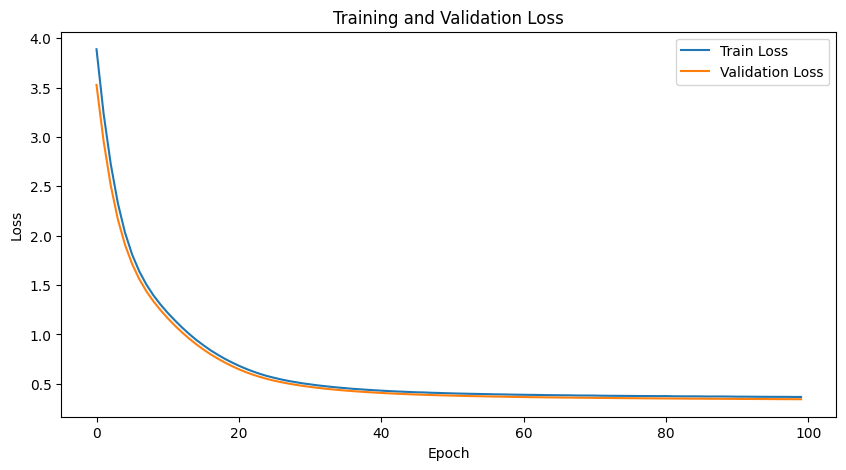

The function took 0.2281 seconds to execute.
The function took 0.0678 seconds to execute.


NameError: name 'test_loader' is not defined

In [18]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
class SingleLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  # Single layer with 64 neurons

    def forward(self, x):
        return self.linear(x)  # Linear activation (default)

# Initialize model, loss function, and optimizer
model = SingleLayerNN(input_size=14, output_size=64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Training loop with early stopping
def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion):
    num_epochs = 100
    patience = 10  # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses

def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy

model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)

# 2. Then evaluate the trained model
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)

# 3. Finally print the results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NonLinearModel(14, 64)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion):
    num_epochs = 100
    patience = 10  # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses

training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)
print(f'Learned weights: {model.fc1.weight.data}')
print(f'Learned biases: {model.fc1.bias.data}')
print(f'Learned weights: {model.fc2.weight.data}')
print(f'Learned biases: {model.fc2.bias.data}')
print(f'Learned weights: {model.fc3.weight.data}')
print(f'Learned biases: {model.fc3.bias.data}')
print(f'Learned weights: {model.fc4.weight.data}')
print(f'Learned biases: {model.fc4.bias.data}')
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## Task3: The impact of specific features

As you learned in the lecture, biases in data collection can carry over to the model and become inductive biases.  
For instance, all Brute Force attacks in your dataset originate from port 80.  

- Is this a reasonable assumption?  
-  Now replace port 80 with port 8080 for the Brute Force attacks in the test set. Use the previously trained model for inference:  
    - Does the performance change?
    - How does it change?
    - Why?

Now remove the feature **port** from the original dataset (**use this dataset from now on for the entire lab**) and repeat all preprocessing steps.  

- How many PortScan instances do you now have after preprocessing?
- How many did you have before?
- Why do you think PortScan is the most affected class after dropping duplicates?
- Are the classes now balanced?

Now repeat the training process with the best architecture found in the previous step:  
- How does the performance change?
- Can you still classify the rarest class?

To improve performance and account for class imbalance, use a *weighted loss function*. Use the `weight` parameter of `CrossEntropyLoss`, which expects a tensor of class weights. To estimate the weights, use the `compute_class_weight` function from `sklearn` and set `class_weight="balanced"`. Repeat the training process with the new loss function.  

- How does the performance change per class and overall?
- How does the accuracy change?
- How does the F1-score change?  


In [ ]:
1+1

## Task 4: Deep Neural Network

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 6                              |
| Neurons per Layer          | {256, 128, 64, 32, 16}        |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50                             |
| Regularization             | None                           |

NOTICE: Each # Neurons per Layer describes ow many neurons must be present in each
layer. For example: 1st layer 256, 2nd layer 128 etc.
- What do the losses look like? Is the model overfitting?
Now apply normalization techniques (dropout, batch normalization) and play with the
regularization of the weights (AdamW’s weight decay).
- What impact do the different normalization techniques have on validation and testing
performance?